# Regression & classification with Multi-layer Perceptron Neural Networks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np


# Classification

Dataset preprocessing

In [ ]:
from sklearn.datasets import load_iris

#loading the dataset
iris_data = load_iris()
dataframe1 = pd.DataFrame(iris_data.data)

#arranging the dataset as features and targets
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

#chekking datasets attributes
print(dataframe1.head())
print(dataframe1.shape)
print(dataframe1.info())
print(dataframe1.describe())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
(150, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


Scaling the Attributes


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

Training the model with logistic sigmoid hidden layer activation function

0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        13
           2       0.20      1.00      0.33         6

    accuracy                           0.20        30
   macro avg       0.07      0.33      0.11        30
weighted avg       0.04      0.20      0.07        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


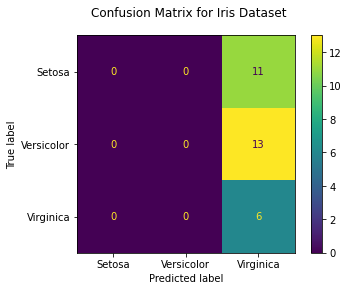

weights between input and first hidden layer:
[[ 0.00725626  0.01767466 -0.0649269  ...  0.06623433  0.04017035
   0.08001314]
 [-0.00763177  0.04456989 -0.05892972 ... -0.03768904 -0.00860119
  -0.04890527]
 [-0.05591586 -0.06911853  0.05152464 ... -0.10201867  0.05968343
   0.03366386]
 [ 0.07351049 -0.01912768  0.07398572 ...  0.00371556  0.0099526
   0.08332697]]

weights between first hidden and second hidden layer:
[[ 0.04780075  0.00485448  0.03672847 ...  0.08229742  0.0321225
  -0.01923015]
 [-0.04763544 -0.05564244  0.01653327 ...  0.05027836 -0.05473399
  -0.03535541]
 [-0.01590126 -0.05719475 -0.0492529  ... -0.0050689  -0.04290545
   0.07575497]
 ...
 [ 0.04388444 -0.00099551 -0.01792916 ...  0.01286199 -0.04246246
  -0.001974  ]
 [ 0.03064838 -0.00139     0.0139147  ... -0.03599941 -0.04973397
   0.08700775]
 [-0.04261132 -0.07920952  0.01536847 ...  0.02383316 -0.04475956
  -0.04348959]]


In [ ]:
#‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
MLP_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="logistic",random_state=1).fit(X_trainscaled, y_train) 

y_pred=MLP_clf.predict(X_testscaled)
print(MLP_clf.score(X_testscaled, y_test))
print(classification_report(y_test,y_pred))

fig=plot_confusion_matrix(MLP_clf, X_testscaled, y_test,display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

print("weights between input and first hidden layer:")
print(MLP_clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(MLP_clf.coefs_[1])

Training the model with rectified linear unit hidden layer activation function

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



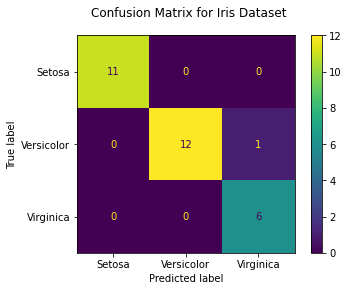

weights between input and first hidden layer:
[[-0.03896267  0.07401138 -0.12882968 ...  0.23190721  0.1704669
   0.10634366]
 [-0.0190693   0.03029681 -0.09792644 ... -0.04372449  0.08961915
  -0.07877378]
 [-0.13161856 -0.07396447  0.08965116 ... -0.17811064  0.14805105
   0.07589062]
 [ 0.09599889  0.01031375  0.11886251 ... -0.0278361   0.01940236
   0.14712954]]

weights between first hidden and second hidden layer:
[[ 7.01869791e-02  4.19840540e-02  6.59836829e-02 ...  1.12574278e-01
   8.79122031e-02 -2.65668552e-02]
 [-9.14639202e-02 -1.06925614e-02  2.28906085e-02 ...  6.05913333e-02
  -7.49012468e-02 -6.75198240e-02]
 [-1.72104484e-02 -9.74765030e-02 -8.84671356e-02 ... -9.65871273e-04
  -1.33454041e-02  1.41857890e-01]
 ...
 [ 1.20997421e-01  2.49193586e-02 -1.13072592e-01 ...  2.52098743e-06
   8.81765446e-02 -1.04190915e-01]
 [-3.19476988e-02  8.62975790e-03  8.72108926e-02 ... -1.34321131e-02
  -2.35404654e-01  2.78895844e-01]
 [-7.80744571e-02 -1.24436646e-01  4.78638927

In [ ]:
#‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
MLP_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=MLP_clf.predict(X_testscaled)


print(MLP_clf.score(X_testscaled, y_test))
print(classification_report(y_test,y_pred))


fig=plot_confusion_matrix(MLP_clf, X_testscaled, y_test,display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

print("weights between input and first hidden layer:")
print(MLP_clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(MLP_clf.coefs_[1])

# Regression

Loading the dataset

In [ ]:
from sklearn.datasets import fetch_california_housing


cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target


dataframe2=pd.DataFrame(cal_housing.data)
print(dataframe2.shape)
print(dataframe2.head())
print(dataframe2.info())
print(dataframe2.describe())

(20640, 8)
        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
 1   1       20640 non-null  float64
 2   2       20640 non-null  float64
 3   3       20640 non-null  float64
 4   4       20640 non-null  float64
 5   5       20640 non-null  float64
 6   6       20640 non-null  float64
 7   7       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
                  0             1  ...             6

Splitting and scaling the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

Training the model and printing the r2 score

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.7633133194205104


In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="logistic" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.7287532140263422
